# Python整理
* 基础知识整理自白夜黑羽教程，Python100天项目，Learn Python In Y minutes

# 虚拟环境管理
   - Python3.2以后自带了虚拟环境管理库venv
   - 执行python -m venv for_django 就创建了一个名字为for_django的虚拟环境，他与主机环境和其他虚拟环境是隔离开的
   - 执行for_django\Scripts\for_django.bat 就激活了虚拟环境

# 语言元素

* 变量类型转换函数  
* chr()：将整数转换成该编码对应的字符串（一个字符）  
* ord()：将字符串（一个字符）转换成对应的编码（整数）  

In [5]:
print(ord('a'))
print(chr(97))

97
a


# 运算符相关

* 比较运算符的优先级高于赋值运算符
* 赋值运算符总是习惯性地写成=，应该是==
* None是一个对象，比较时用is,而不能用==

In [5]:
a = 1==3 #先执行1==3，得到False后，再赋值给a
print(a)

False


and 和 or 都具有短路的作用，即and左侧为False，那么将不会判断右侧，而or左侧为True右侧
将不会被判断


# 格式化输出

In [14]:
F = float(input('F='))
C = (F-32) / 1.8

print('%.1f华氏度 = %.1f摄氏度'%(F,C))

print(f'{F:.1f}华氏度 = {C:.1f}摄氏度')

print('{0:.1f}华氏度 = {1:.1f}摄氏度'.format(F,C)) #format时，内部的索引可省略


F=36
36.0华氏度 = 2.2摄氏度
36.0华氏度 = 2.2摄氏度
36.0华氏度 = 2.2摄氏度


## 扁平化优于嵌套，嵌套将影响代码的可读性

## 函数的参数
- 位置参数
- 默认参数，通常需要设定为不可变对象
- 关键字参数
- 可变参数，可变关键字参数,\*和\**的适用

In [20]:
#默认参数，如果不额外传入参数，函数的参数为默认参数
def hello(a=0):
    print(a)
hello(5)
hello()

5
0


In [2]:
#不确定参数个数时使用可变参数
def add(*args): #可变参数传入后在函数体内为tuple类型
    print(type(args))
    print(args) 
    sum1 = 0
    for i in args:
        sum1 += i
    print(sum1)

add(5,6,7,8,9)

add(*[5,6,7,8,9]) #使用*将列表中的所有元素作为可变数组传入

<class 'tuple'>
(5, 6, 7, 8, 9)
35
<class 'tuple'>
(5, 6, 7, 8, 9)
35


In [6]:
# **args表示接受可变个数的关键字参数
def person(name, age, **kw): #args在传入时自动封装为字典形式
    print('name:', name, 'age:', age, 'other:', kw)
    
person('Michael', 30)

person('Adam', 45, gender='M', job='Engineer')

extra = {'city': 'Beijing', 'job': 'Engineer'}
person('Jack', 24, **extra) #使用**将字典的键值对作为关键字参数传入

name: Michael age: 30 other: {}
name: Adam age: 45 other: {'gender': 'M', 'job': 'Engineer'}
name: Jack age: 24 other: {'city': 'Beijing', 'job': 'Engineer'}


# 用模块来组织函数

* python中一个.py文件就是一个模块  
* 在不同的模块里有相同的函数，是可以被接受的  
* 另外，如果模块文件中存在另外的可执行代码，在导入模块时会被执行
* 我们并不想要执行他，则按照下面的方法进行封装
* 导入模块后，使用dir(模块名)可以查看包含的方法和属性

In [8]:
def main():  
    #to do:add your code here
    pass
#__name__是python中的隐含变量，他代表的是模块的名字
#模块直接被执行时，才为main,导入模块时不会执行if条件下的语句
if __name__ == '__main__':
    main()

In [104]:
import math #使用dir函数来查看该模块下的方法和属性
dir(math)

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'pi',
 'pow',
 'radians',
 'remainder',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc']

## 变量的作用域

nonlocal在函数内部声明变量时
- 含义为该变量不是当前函数内部的局部变量，也不是全局变量  
- 避免使用全局变量，以降低程序之间的耦合，不妨碍垃圾回收
- 如果需要在函数调用结束以后，仍然需要用到变量的值，需要用到闭包（参考interview notes）
- 是当前函数的父函数内部的局部变量
- 当程序运行当包括某个变量的语句时，将会按照LEGB的顺序去查找变量的值

In [25]:
count = 100
def f():
    count = 1
    def x():
        nonlocal count #这里改变的父函数内变量count的值
        count += 5
    x()
    return count
print(f())      

6


# 字符串

- 使用*号，可以对字符串进行解绑（只要是可迭代对象都可以解绑）

In [75]:
line = 'nobody:*:-2:-2:Unprivileged User:/var/empty:/usr/bin/false'
uname, *fields, homedir, sh = line.split(':')
print(fields) #以:为分隔符分隔，赋值给可变对象化fields

['*', '-2', '-2', 'Unprivileged User']


* 合并字符串

In [12]:
a,b = 'kobe','bryant'
print(a+b)
print('kobe ' 'bryant')

kobebryant
kobe bryant


- 不同行的字符组成同一个字符串用

In [11]:
S = '''
wo ai ni 
ni ai wo 
mi xue bing
cheng tian mi
mi
'''
print(S)


wo ai ni 
ni ai wo 
mi xue bing
cheng tian mi
mi



转义字符'\'的使用
- \n为换行符  
- \t为制表符tab 
- 如果要是\仅代表'\\'而不是转义字符字符串前+r

In [16]:
S1 = 'a\nb'
S2 = r'a\nb'
print(S1)
print(S2)

a
b
a\nb


- 字符串处理的相关函数

In [8]:
S = ' kobe bryant '
print(S.capitalize()) #获得首字母大写后的字符串
print(S.title()) #每个单词首字母大写后的字符串
print(S.upper()) #字符串整个变大写
print(S.find('br')) #查找子字符串的位置
print(S.index('br')) #查找子字符串的位置
print(S.startswith('kobe')) #验证是否以某字符串开头
print(S.endswith('ant')) #验证是否以某字符串结尾

#字符串末位位置为20
print(S.center(20, '*')) #将字符串以指定的宽度居中，并在两侧填充指定的字符

#字符串末位位置为30
print(S.rjust(30, '-')) #将字符串以指定的宽度靠右放置，左侧填充指定的字符

print(S.isdigit()) #检查字符串是否是数字构成
print(S.isalpha()) #检查字符串是否是字母构成
print(S.isalnum()) #检查字符串是否由数字和字母构成
print(S.strip()) #修剪字符串两侧空格

S1 = 'kobe bryant'
print(S1.split(' '))#将字符串以某一参数为间隔，分隔开后，每个小部分作为列表的一个元素，返回一个列表

S2 = S1.replace('kobe', 'kobe bean')
print(S2)

 kobe bryant 
 Kobe Bryant 
 KOBE BRYANT 
6
6
False
False
*** kobe bryant ****
----------------- kobe bryant 
False
False
False
kobe bryant
['kobe', 'bryant']
kobe bean bryant


- join函数的使用(Leetcode常用)
 - str(某种标志字符串，可以为空).join(['a','b','c'])将字符列表以字符str为间隔链接起来

In [3]:
icon = '-'
str1 = [i for i in 'kobebryant']
print(icon.join(str1))
print(icon.join('kobe'))

k-o-b-e-b-r-y-a-n-t
k-o-b-e


# Python 内置数据结构

In [52]:
a = {1,2,3,[5,6]}

TypeError: unhashable type: 'list'

* 元组内部的元素只能是不可变对象，数值，字符串等等,这句话是错误的
* 元组的元素不可以修改，这句话才对(注意这里只保证一级元素不能被修改，嵌套的部分是能被修改的)
* 元组：只有一个元素的元组需要包含一个逗号,例子如下
* 元组：Unpack操作,等号的两边都是元组,且()可选
* 当函数具有多个返回值时，缺省的组成元组
- 列表和元祖之间可以相互转换，list和tuple函数

In [7]:
a = (1,2,3,4,5)
b = (1,2,3,[1,2])
b[3].append(5)
print(b)
print(type(b))
print(a[1])
# a[1] = 10 #不可变对象

(1, 2, 3, [1, 2, 5])
<class 'tuple'>
2


* Python，Swap魔法糖原理：与元组相关  
 - a = 1  #变量a指向1  
 - b = 2  #变量b指向2  
 - a,b = b,a #该行代码实际上等价于(a,b) = (b,a),创建元组后将b,a放入，赋值语句即将a指向b所   指向的对象，将b指向a指向的对象  
 - 参考Leetcode翻转链表题目

In [31]:
print(type(1))
print(type((1,)))
print(type(()))

<class 'int'>
<class 'tuple'>
<class 'tuple'>


- 解绑：只要是可迭代的对象，都可以用多个变量进行解绑，迭代器和生成器也可以

In [4]:
# 解绑
a,b,c,d = (1,2,3,4)
print(a,b,c,d)

#Python中的多重赋值其实就是元组的解绑
e,f = 1,2 # 等价于a,b = (1,2)

#能够使用*进行可变解绑
x,*y,z = (1,2,3,4)
print(x,y,z)

# 对迭代器的解绑
a1, b1, c1 = iter([100, 200, 300])
print(a1,b1,c1)

1 2 3 4
1 [2, 3] 4
100 200 300


* 列表
 - 返回列表的索引和对应的值，函数enumerate的使用
 - 两个列表之间可以使用>,<运算符进行比较，首个元素大的列表更大

In [33]:
A = [2,3,4,5]
B = [4]
if A > B:
    print(A)
else:
    print(B)

[4]


- Python的列表是一个可变长度的顺序存储结构，每一个位置存放的都是元素对象的指针。
- 切片操作将会创建一个新的对象

In [6]:
a = [i for i in range(10)]
print(a is a[:])

False


In [32]:
list1 = [i**2 for i in range(10)]
for idx,item in enumerate(list1):
    print(idx,item)

0 0
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81


- 合并两个列表

In [27]:
list1 += [1,2,3]
print(list1)
list1.extend([i for i in range(3)])
print(list1)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 1, 2, 3, 1, 2, 3, 0, 1, 2, 1, 2, 3]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 1, 2, 3, 1, 2, 3, 0, 1, 2, 1, 2, 3, 0, 1, 2]


- 对列表进行排序,列表元素如果是字符串则按照首字母进行排序

In [35]:
list1 = ['orange', 'apple', 'zoo', 'internationalization', 'blueberry']
list2 = sorted(list1) #不修改原数组，函数的设计不要产生副作用
print(list2)

['apple', 'blueberry', 'internationalization', 'orange', 'zoo']


In [36]:
#sorted函数可以指定函数的关键字
list2 = sorted(list1,reverse = True)
print(list2)

list3 = sorted(list1,key = len) #按照字符串的长度进行排序
print(list3)

list1.sort(reverse = True)
print(list1)

['zoo', 'orange', 'internationalization', 'blueberry', 'apple']
['zoo', 'apple', 'orange', 'blueberry', 'internationalization']
['zoo', 'orange', 'internationalization', 'blueberry', 'apple']


- 列表生成式和生成器
 - 列表生成式直接创建出列表，其占据内存空间大
 - 生成器占用内存小，是python的一种对象，使用for循环可以对其进行遍历

In [42]:
list1 = [i+j for i in 'abcde' for j in '12345']
print(list1)
import sys
print(sys.getsizeof(list1)) #占内存264

generator1 = (i+j for i in 'abcde' for j in '12345')
print(generator1)
print(sys.getsizeof(generator1)) #占内存120
for i in generator1:
    print(i)

['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'c1', 'c2', 'c3', 'c4', 'c5', 'd1', 'd2', 'd3', 'd4', 'd5', 'e1', 'e2', 'e3', 'e4', 'e5']
264
<generator object <genexpr> at 0x00000196B048D9C8>
120
a1
a2
a3
a4
a5
b1
b2
b3
b4
b5
c1
c2
c3
c4
c5
d1
d2
d3
d4
d5
e1
e2
e3
e4
e5


- 在函数体内的循环语句下，使用yield 字段生成器创建
 - 函数的调用f()是generator对象

- 生成器占用内存小，是python的一种对象，使用for循环可以对其进行遍历

In [39]:
generator1 = (i+j for i in 'abcde' for j in '12345')
print(generator1)
for i in generator1:
    print(i)

<generator object <genexpr> at 0x00000196B048DD48>
a1
a2
a3
a4
a5
b1
b2
b3
b4
b5
c1
c2
c3
c4
c5
d1
d2
d3
d4
d5
e1
e2
e3
e4
e5


In [53]:
def f():
    for i in range(10):
        yield i
print(f()) #函数调用f()是一个generator对象
for i in f():
    print(i)

<generator object f at 0x00000196B048DCC8>
0
1
2
3
4
5
6
7
8
9


- 集合内部的元素只可以是不可变对象，包括数值，字符串,元组
- 创建空集合的语句时a = set(),而不是a = {}
- 集合如同数学概念中的集合，不允许存在重复元素，可以进行并集交集差集运算

In [60]:
set1 = {1,2,3,'kobe',[12,3]} 

TypeError: unhashable type: 'list'

In [58]:
set2 = set()
print(set2)
print(type(set2))

set()
<class 'set'>


- 向集合内添加和删除元素

In [61]:
set1 = {1,2,3}
set1.add(4)
print(set1)
set1.update([8,0])
print(set1)
set1.discard(0)
print(set1)
set1.remove(8)
print(set1)

{1, 2, 3, 4}
{0, 1, 2, 3, 4, 8}
{1, 2, 3, 4, 8}
{1, 2, 3, 4}


- 集合成员的运算

In [77]:
a = {1,2,3}

In [78]:
a.add((1,2)) #添加对象
print(a)

print(a&{1,2}) #求交集

print(a | {5}) #求并集

print(a - {5}) #求差集

print(a^{1,2,3}) #求并集减去交集

print(a >= {3}) #查看是否为子集

{(1, 2), 1, 2, 3}
{1, 2}
{(1, 2), 1, 2, 3, 5}
{(1, 2), 1, 2, 3}
{(1, 2)}
True


# 字典—重点

- zip函数的用法

In [14]:
a = zip(['kobe','wade'],[24,3]) # 创建除了一个zip对象，其实际上是一个生成器，可以使用for循环取出
for i in a:
    print(i)

('kobe', 24)
('wade', 3)


- 创建字典的方法

In [19]:
#使用dict函数
a = dict(kobe= 24,wade=3)
print(a)

# 通过zip函数将两个序列压成字典
b = dict(zip(['kobe','wade'],[24,3]))
print(b)

# dict和元组结合的方式
d = dict([('kobe', 24), ('wade', 3)])
print(d)

# 字典推导式
c = {num : num**2 for num in range(3)}
print(c)

{'kobe': 24, 'wade': 3}
{'kobe': 24, 'wade': 3}
{'kobe': 24, 'wade': 3}
{0: 0, 1: 1, 2: 4}


- 字典相关操作

In [20]:
a.update(derozan=10)#插入一对键值对
print(a)

print(a.get('kawai',5)) #获取key = kawai的值，如果不存在，则指定默认值为5
print(a)

a.popitem() #删除最后一对键值对
print(a)

a.pop('wade') #删除指定键值对
print(a)

print(a.keys()) #获取所有键

print(a.values()) #获取所有值

a.setdefault('lavine', 24) #插入一个键值对，当该键不存在时，有默认值24，否则无法改变原先存在的
print(a)

a.setdefault('lavine', 225) 
print(a)

for i in a.items(): #获取字典的每个键值对象
    print(i) #组合成了元组

a.setdefault('rondon', 9)
a.setdefault('rondon', 58) # setdefault，如果键已经存在，不做改变，不存在则给定一个默认的值
print(a)

{'kobe': 24, 'wade': 3, 'derozan': 10}
5
{'kobe': 24, 'wade': 3, 'derozan': 10}
{'kobe': 24, 'wade': 3}
{'kobe': 24}
dict_keys(['kobe'])
dict_values([24])
{'kobe': 24, 'lavine': 24}
{'kobe': 24, 'lavine': 24}
('kobe', 24)
('lavine', 24)
{'kobe': 24, 'lavine': 24, 'rondon': 9}


- 字典的键只能是不可变类型：int,float,string,tuple

In [74]:
a[[1,2,3]] = 35

TypeError: unhashable type: 'list'

# 面向对象支柱：封装、继承和多态
类与类之间的关系：
* is-a关系：继承  
* has-a关系：关联 / 聚合 / 合成  
* use-a关系：依赖  

属性、方法的可见性：
 - Python当中类的属性和方法有私有和公开两种访问权限  
 - 私有方法或者属性，需要在属性和方法命名之前加上两个下划线 
 - 类变量，定义在类内，方法之外，每一个实例都可以访问和修改，类名.类变量，实例名.类变量
     可以访问（调用时，先查找实例变量，在查找类变量）
     - 注意，某个实例的实例变量与类变量同名，优先的是实例变量

In [80]:
class Test:

    def __init__(self, foo):
        self.__foo = foo

    def __bar(self):
        print(self.__foo)
        print('__bar')


def main():
    test = Test('hello')
    test.__bar()#程序运行到这里会抛出no attribute错误，原因是无法在定义类的代码之外
    #调用私有方法以及访问属性

    print(test.__foo)# 


if __name__ == "__main__":
    main()

AttributeError: 'Test' object has no attribute '__bar'

 - @property方法，处理属性的私有和访问

In [1]:
class Person(object):

    def __init__(self, name, age):
        self._name = name
        self._age = age

    # 访问器 - getter方法
    @property #装饰器的思想，要访问和修改一个属性
    #首先@property装饰一个返回原属性的方法
    #然后再使用@age.setter装饰同名函数，函数内部实现属性修改
    def name(self):
        return self._name

    # 访问器 - getter方法
    @property
    def age(self): # 使用property将方法转换成了属性，可以直接进行访问
        return self._age

    # 修改器 - setter方法
    @age.setter
    def age(self, age):
        self._age = age

    def play(self):
        if self._age <= 16:
            print('%s正在玩飞行棋.' % self._name)
        else:
            print('%s正在玩斗地主.' % self._name)


def main():
    person = Person('王大锤', 12)
    person.play()
    person.age = 22
    print(person.age)
    person.play()
    # person.name = '白元芳'  # AttributeError: can't set attribute


if __name__ == '__main__':
    main()


王大锤正在玩飞行棋.
22
王大锤正在玩斗地主.


-  _slots__魔法，静态方法，类方法

1.在类的初始化函数之前可以使用\__slot\__语句来限定该类下面的实例可以绑定的属性种类和个数  
- \_\_slot\_\_slot魔法对继承该类的子类不起作用
2.静态方法和类方法类似，都是类名所能调用的方法（在实例化某个对象之前）  
3.静态方法查看下方代码，类方法查看时钟代码，为了避免混淆，建议只是用类名.静态方法的方式调用静态方法

In [86]:
class AvModels(object):
    __slots__ = ('_name','_cup','_age')
    def __init__(self,_name,_cup,_age):
        self._name = _name
        self._cup = _cup
        self._age = _age
    @staticmethod
    def isRetired(age): #静态方法可以在实例化以前进行调用，因此self特殊参数不可以作为其
        #参数，调用格式为  类名.方法名(),需要传入其需要的参数
        return True if age > 35  else False
    def show(self):
        print(f'{self._name}\'s cup is {self._cup}')
model = AvModels('kizaki','C','36')
# model.height = 168 AttributeError: 'AvModels' object has no attribute 'height'
model.show()
AvModels.isRetired(38)

#在复杂项目中使用模块等来组件类时，实例方法的调用方式为
AvModels.show(model)

kizaki's cup is C
kizaki's cup is C


- 类方法，使用cls关键字,即cls作为静态方法的默认参数

In [87]:
from time import sleep,time,localtime

class Clock(object):
    def __init__(self,hour,minute,second):
        self.hour = hour
        self.minute = minute
        self.second = second
        
    @classmethod #类方法定义格式
    def now(cls): #首个参数指定为cls
        ctime = localtime(time())
        print(ctime)
        print(cls) #cls指向Clock类
        return cls(ctime.tm_hour,ctime.tm_min,ctime.tm_sec) #这里实际上返回了一个Clock实例对象,(时，分，秒)
        
        
    def run(self):
        self.second += 1
        if self.second == 60:
            self.second = 0
            self.minute += 1
            if self.minute == 60:
                self.minute = 0
                self.hour += 1
                if self.hour == 24:
                    self.hour = 0
                    self.second = 0
                    self.minute = 0
def main():
    time_now = Clock.now()
    for i in range(3600):
        sleep(1)
        time_now.run()
        print(f'{time_now.hour}:{time_now.minute}:{time_now.second}')
if __name__ == '__main__':
    main()      

time.struct_time(tm_year=2021, tm_mon=8, tm_mday=8, tm_hour=14, tm_min=57, tm_sec=54, tm_wday=6, tm_yday=220, tm_isdst=0)
<class '__main__.Clock'>
14:57:55
14:57:56
14:57:57
14:57:58
14:57:59
14:58:0
14:58:1
14:58:2
14:58:3
14:58:4
14:58:5
14:58:6
14:58:7
14:58:8
14:58:9
14:58:10
14:58:11
14:58:12
14:58:13
14:58:14
14:58:15
14:58:16
14:58:17
14:58:18
14:58:19
14:58:20
14:58:21
14:58:22
14:58:23


KeyboardInterrupt: 

### 类，类的方法、类变量、类的实例和实例变量在内存中的储存
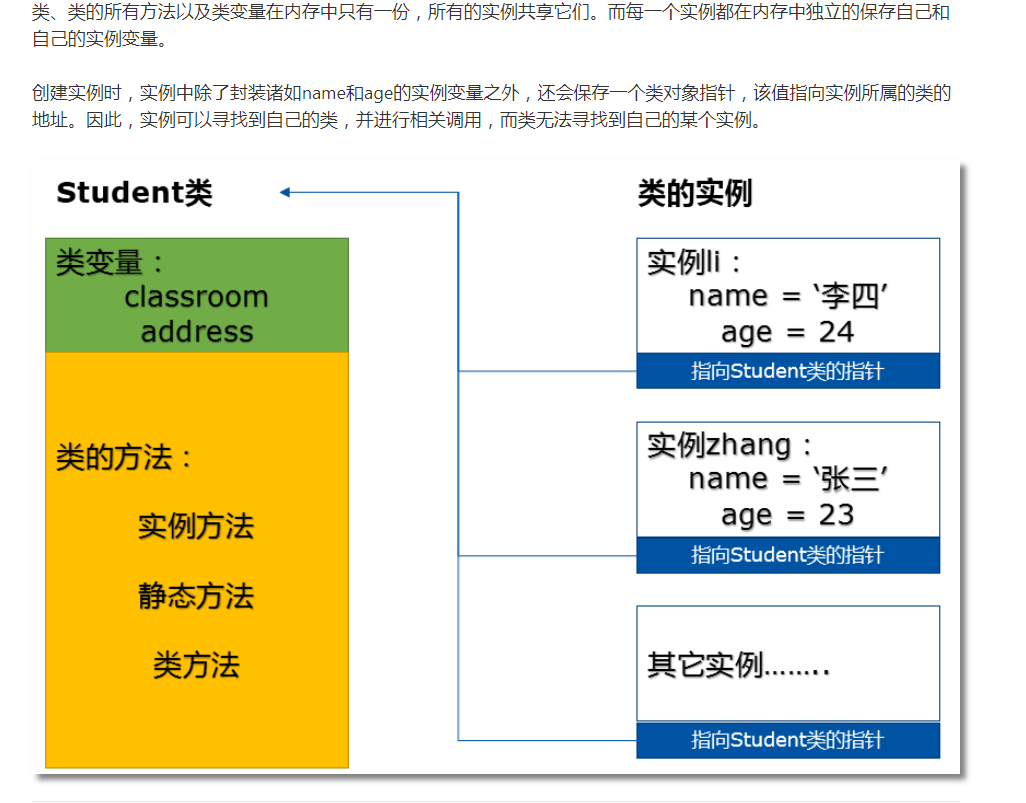

 ### 继承和多态

- 在已有类的基础上创建新类，即继承父类，子类将会继承父类中的属性和方法。
- 模板性的，重复的，共有的代码可以放在父类里，其他类继承之后便具有了该功能。
- 子类继承了父类的方法以后，在内部可以对方法进行更新，加强其功能，称为多态  
- 以一个简单的例子来理解继承，多态以及super().\__init\__函数的用法  
- 无法实例化的类称为抽象类，Python中可以abc模块来实现，抽象类不可以进行实例化，是专门用来被别的对象继承的类

### 在子类中强制调用父类方法的语句
super(父类，self).父类方法（父类参数1，父类参数2....）

In [94]:
class A:
     def add(self, x):
         y = x+1
         print(y)
class B(A):
    def add(self, x):
        print(super())
        super().add(x) #super()用来调用父类中相同名字的方法
b = B()
b.add(2)  #代码的执行过程为，b调用add函数，进入函数后，执行A.add(x)，即y = 2+1=3 ,print(3)

<super: <class 'B'>, <B object>>
3


In [15]:
class FooParent(object):
    def __init__(self):
        self.parent = 'I\'m the parent.'
        print ('Parent')
    
    def bar(self,message):
        print ("%s from Parent" % message)
 
class FooChild(FooParent):
    def __init__(self):
        # super(FooChild,self) 首先找到 FooChild 的父类（就是类 FooParent），然后把类 FooChild 的对象转换为类 FooParent 的对象
        super(FooChild,self).__init__()    
        print ('Child')
    
    #这里的代码逻辑关系较为复杂   
    def bar(self,message):
        #子类调用bar方法时，首先会将self参数传递给父类
        super(FooChild, self).bar(message) #这里运行的实际上是FooParent内的bar函数，运行结果为HelloWorld from Parent
        print ('Child bar fuction')
        print (self.parent) 
 
if __name__ == '__main__':
    fooChild = FooChild()
    fooChild.bar('HelloWorld')

Parent
Child
HelloWorld from Parent
Child bar fuction
I'm the parent.


### Python3的继承机制
 - 多重继承时，按照先后顺序去父类中寻找方法
 - 在父类中搜索方法和变量时，按照最短路径原则查找

### 设计模式初阶

# GUI用户界面(参考白夜)

# 文件读取和异常处理

1. 使用Python中的open函数可以打开指定路径下的文件，打开模式，编码方式
2. 指定读取方式，包括以下多种：  
    'r'	读取 （默认）  
    'w'	写入（会先截断之前的内容）  
    'x'	写入，如果文件已经存在会产生异常  
    'a'	追加，将内容写入到已有文件的末尾  
    'b'	二进制模式  
    't'	文本模式（默认）  
    '+'	更新（既可以读又可以写）  

In [29]:
def main():
    f = open('致橡树','w') #以写入模式打开致橡树文件，如果文件不存在将创建新的文件
    f.write('我深爱的这篇土地') #写入字符串
    f.close()
    f = open('致橡树','r')
    print(f.readline())
if __name__ == '__main__':
    main()

我深爱的这篇土地


- 异常处理：Try,Except语句

In [97]:
def main():
    f = None
    try: #尝试执行try缩进块下的语句，如果出现错误，将执行except抛出错误信息
        f = open('致橡树1.txt', 'r', encoding='utf-8')
        print(f.read())
    except FileNotFoundError:
        print('无法打开指定的文件!')
    except LookupError:
        print('指定了未知的编码!')
    except UnicodeDecodeError:
        print('读取文件时解码错误!')
    finally: #不管有没有错误被抛出都将执行，释放出程序资源
        if f:
            f.close()


if __name__ == '__main__':
    main()


无法打开指定的文件!


# 常用内置模块
- collections内置模块中有很多方法可以帮助刷题

- nametuple

In [19]:
from collections import namedtuple
Point = namedtuple('Point', ['x','y'])
print(p.x) #可以使用索引来访问tuple中的元素
print(isinstance(p,tuple))

1
True


- deque 双端队列

In [22]:
#双端队列
from collections import deque

a = deque([1,2,3,4,5])
a.append(6)
a.appendleft(0) #可以在左侧进行添加
print(a)

a.pop()
a.popleft() #可以在左侧删除
print(a)

deque([0, 1, 2, 3, 4, 5, 6])
deque([1, 2, 3, 4, 5])


- defaultdic 当字典中的key值不存在时，抛出默认值

In [28]:
from collections import defaultdict
dd = defaultdict(lambda: 'kizaki')
dd[1] = 'akari'
print(dd[1])
print(dd[2]) #实际上2这个键是不存在的，调用匿名函数返回了默认的值

akari
kizaki


- orderedict 字典中保持键的顺序

In [39]:
from collections import OrderedDict
d = dict([('a', 1), ('b', 2), ('c', 3)]) #通常情况下字典的键是无序的

od = OrderedDict([('a', 1), ('b', 2), ('c', 3)]) # 使用orderedDict后键是由顺序的

# 其顺序是按照插入字典的顺序

dic = OrderedDict()
dic[1] = 'a'
dic[10] = 'b'
dic[2] = 'c'
print(dic) #按照插入顺序排序，而不是按照数字，字母等的顺序


OrderedDict([(1, 'a'), (10, 'b'), (2, 'c')])


- Counter计数器，通常情况是使用dict来+for循环遍历来计数

In [51]:
from collections import Counter
a = 'abcbcbcbbcbccb'
print(Counter(a)) #将可迭代对象中的每个元素的出现自出统计后返回字典
print(Counter(a).most_common(1)) #去除出现次数最多的前n个元素

Counter({'b': 7, 'c': 6, 'a': 1})
[('b', 7)]


### itertools 用来操作可迭代对象的函数模块
- count,cycle,repeat等等函数

In [53]:
import itertools as it
import time
ziranshu = it.count(1) #使用Count进行迭代计数
for i in ziranshu:
    print(i)
    time.sleep(2)

1
2
3
4
5
6


KeyboardInterrupt: 

In [57]:
a = it.cycle('a') #一直重复显示字符串
for i in a:
    print(i)
    time.sleep(2)

a
a
a
a
a
a
a


KeyboardInterrupt: 

In [58]:
rep = it.repeat('I wanna have sex', 3 ) #指定字符串的重复次数
for i in rep:
    print(i)

I wanna have sex
I wanna have sex
I wanna have sex


In [59]:
# 使用takewhile来进行筛选
natuals = itertools.count(1)
ns = itertools.takewhile(lambda x: x <= 10, natuals)
list(ns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
# 使用Chain来进行串联
for i in it.chain('ab', 'cd'):
    print(i)

a
b
c
d


In [68]:
# group by聚合函数，将相邻的相同元素分组在一起
for key, group in it.groupby('AAAAAAABBBBBBBCCCCCCCCDDDDDDDD'):
    print(key,list(group))

A ['A', 'A', 'A', 'A', 'A', 'A', 'A']
B ['B', 'B', 'B', 'B', 'B', 'B', 'B']
C ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
D ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


# 函数的参数与性质
* 函数可以赋值给变量
* 函数可以作为函数的参数
* 函数可以作为函数的返回值

* 函数的参数包括，位置参数，可变参数，关键字参数，命名关键字参数
* 参数的元信息，类似于leetcode里的,制定出输入参数和返回值的类型(int,list,bool）  
提升代码可读性

 ### 高阶函数用法，map,reduce,filter,匿名函数lambda

In [108]:
# 求列表中每个元素的平方
list(map(lambda x:x**2,[1,2,3,4,5]))

[1, 4, 9, 16, 25]

In [113]:
# 使用reduce求列表和
from functools import reduce
reduce(lambda x,y:x + y,[1,2,3,4,5])

15

In [115]:
# 使用filter进行筛选,筛选出大于10的数值
list(filter(lambda x: x>10,[i for i in range(20)]))

[11, 12, 13, 14, 15, 16, 17, 18, 19]

# Python装饰器 （面向切面编程）

1. 装饰器是用来给Python中的函数或者类的方法增加功能的语言糖，被装饰的函数作为装饰器函数 
的参数，用下面的例子来进行详细的理解
2. 装饰器多用于各种框架和库中
3. 当被装饰的函数所含参数个数可变时，可以在装饰器中传入可变参数
4. \*args表示任意多个未指定参数名的参数,\**kargs表示任意多个关键字参数
5. \*args，\**kargs同时使用时，前者在前

### 实现一个打印函数执行时间的装饰器

In [43]:
def record_time(func):
    import time
    start = time.time()
    def wrap(*args,**kwargs): #这样的参数定义方式，实际含义是，无论该函数的参数
        # 是什么类型，该装饰器都可以装饰该函数
        print(f'函数的执行时间为：{time.time()-start}')
        return func(*args,**kwargs)
    return wrap
@record_time
def f(a,b,c,av='kizaki'):
    print(a+b+c)
    print('fuck')
f(10,11,12)

函数的执行时间为：0.0
33
fuck


## Python 进程，线程，协程(并发编程)
参考《Python并行编程中文版》单独总结

- 有两种创建线程的方法
  - 一种是继承Thread类，并且重写run方法
  - 一种是将线程要执行的函数作为参数传递进去

In [1]:
import threading
class MyThread(threading.Thread): #集成Thread类
    def __init__(self, thread_name):
        super(MyThread, self).__init__(name=thread_name)
    def run(self):
        print(f'当前线程：{self.name}')
        
for i in range(10):
    MyThread(f'thread_{i}').start() # 启动线程会直接开始运行MyThread中的Run函数

当前线程：thread_0当前线程：thread_1
当前线程：thread_2
当前线程：thread_3

当前线程：thread_4当前线程：thread_5当前线程：thread_6

当前线程：thread_7
当前线程：thread_8

当前线程：thread_9


In [2]:
# 传参
import threading
import time
def run(args):
    time.sleep(1)
    print(f'当前线程是：{args}')
    
for i in range(10):
    a = threading.Thread(target=run,args=(i,)) #实例化一个线程，传入目标函数
    a.start()

当前线程是：8当前线程是：0当前线程是：9当前线程是：3

当前线程是：4
当前线程是：6
当前线程是：7
当前线程是：2当前线程是：1

当前线程是：5




#### Thread类的参数
`threading.Thread(self, group=None, target=None, name=None,
     args=(), kwargs=None, *, daemon=None)`  
  - 参数group是预留的，用于将来扩展  
  - 参数target是一个可调用对象，在线程启动后执行  
  - 参数name是线程的名字。默认值为“Thread-N“，N是一个数字  
  - 参数args和kwargs分别表示调用target时的参数列表和关键字参数
 #### 对于多线程任务，各个线程之间的地位是均等的
  - 一旦进行调度，每个线程只是自私的完成自己应该完成的任务，不再关注定义线程函数  
      先后位置

## Python网络编程TCP，UDP等等

### socket编程
 - socket 是基于C/S架构的，编写两个.py文件，服务端和客户端
 - 以下是socket编程的核心逻辑
 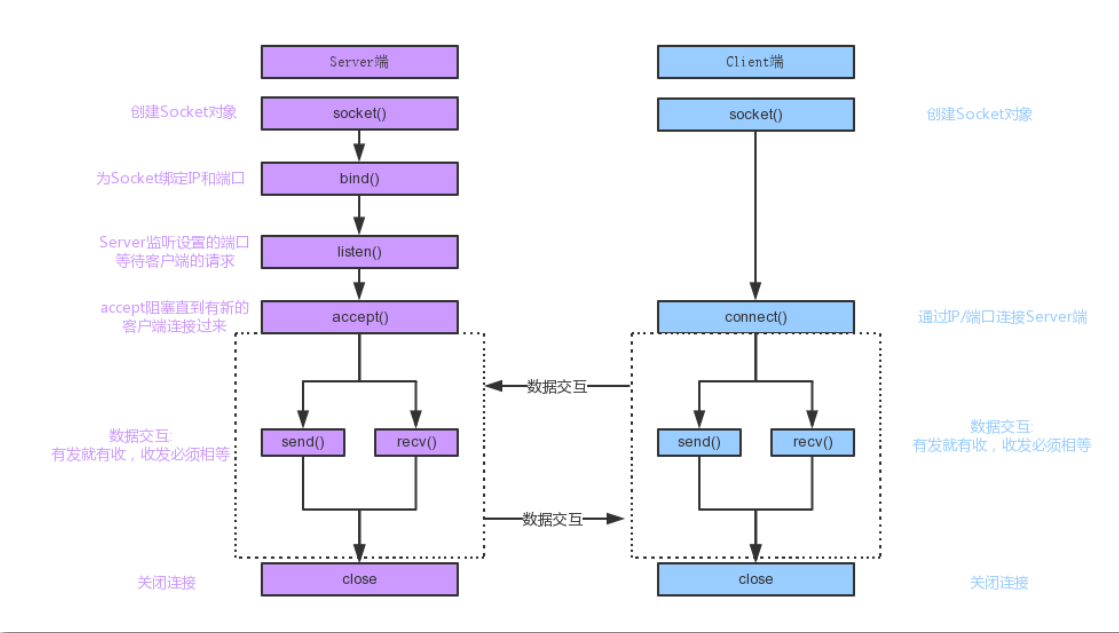
 - socket 编程流程
  - 服务端：
    - 创建套接字，绑定套接字到本地IP与端口：   socket.socket(socket.AF_INET,socket.SOCK_STREAM) , s.bind()
    - 开始监听连接：s.listen()
    - 进入循环，不断接受客户端的连接请求：s.accept()
    - 接收传来的数据，或者发送数据给对方：s.recv() , s.sendall()
    - 传输完毕后，关闭套接字：s.close()
  - 客户端:
    - 创建套接字，连接服务器地址：socket.socket(socket.AF_INET,socket.SOCK_STREAM) , s.connect()
    - 连接后发送数据和接收数据：s.sendall(), s.recv()
    - 传输完毕后，关闭套接字：s.close() 